# 1. Importing libraries

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# reading the data using csv file 
data = pd.read_csv("cosmetics_sales_data.csv")
data.head()

,Sales Person,Country,Product,Date,Amount ($),Boxes Shipped
0,Lucas Verma,Canada,Aloe Vera Gel,2022-04-30,7897.13,358
1,Ethan Reddy,UK,Aloe Vera Gel,2022-01-25,16376.88,449
2,Ananya Gupta,India,Body Butter Cream,2022-08-22,5599.68,264
3,Ananya Gupta,New Zealand,Salicylic Acid Cleanser,2022-08-26,2966.47,144
4,Sophia Nair,UK,Body Butter Cream,2022-05-19,6828.68,484


# 2. Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   374 non-null    object 
 1   Country        374 non-null    object 
 2   Product        374 non-null    object 
 3   Date           374 non-null    object 
 4   Amount ($)     374 non-null    float64
 5   Boxes Shipped  374 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 17.7+ KB


No null values are there! The data is almost cleaned.

In [7]:
# checking duplicate records
data.duplicated().sum()

np.int64(0)

In [8]:
# renaming some columns as per my feasibility
data.rename(columns={"Amount ($)":"Amount", "Sales Person":"Sales_Person", "Boxes Shipped":"Box_Shipped"}, inplace=True)

# 3. Data Transformation

In [9]:
# correcting dtype of Date
data['Date'] = pd.to_datetime(data['Date'])

# extracting month column
data['Month'] = data['Date'].dt.month_name()

# extracting quarters column
def assign_qtrs(month):
    if month in ['January', 'February', 'March']:
        return "Q1"
    elif month in ['April', 'May', 'June']:
        return "Q2"
    elif month in ['July', 'August', 'September']:
        return 'Q3'
    else:
        return "Q4"

# extract Quarters - as general, not year-wise
data['Quarter'] = data['Month'].apply(assign_qtrs)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Sales_Person  374 non-null    object        
 1   Country       374 non-null    object        
 2   Product       374 non-null    object        
 3   Date          374 non-null    datetime64[ns]
 4   Amount        374 non-null    float64       
 5   Box_Shipped   374 non-null    int64         
 6   Month         374 non-null    object        
 7   Quarter       374 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 23.5+ KB


# 4. Detailed Statistical Analysis - EDA

In [11]:
df = data

## **1. Sales Performance Overview**

**a) What is the total revenue and total boxes shipped overall and per salesperson?**

In [12]:
result = df.groupby('Sales_Person')[['Amount', 'Box_Shipped']].sum().reset_index()
result.rename(columns={'Amount': 'Total_Amt', 'Box_Shipped': 'Total_Box_Shipped'}, inplace=True)
result


,Sales_Person,Total_Amt,Total_Box_Shipped
0,Ananya Gupta,293204.67,9669
1,Ava Sharma,246174.28,7849
2,Ethan Reddy,298595.61,8814
3,Isabella Roy,302087.60,9116
4,Liam Patel,270960.55,8513
5,Lucas Verma,295166.91,9330
6,Mason Kapoor,223432.69,7367
7,Noah Mehta,272188.08,9403
8,Olivia D'Souza,387405.91,12619
9,Sophia Nair,319887.82,10473


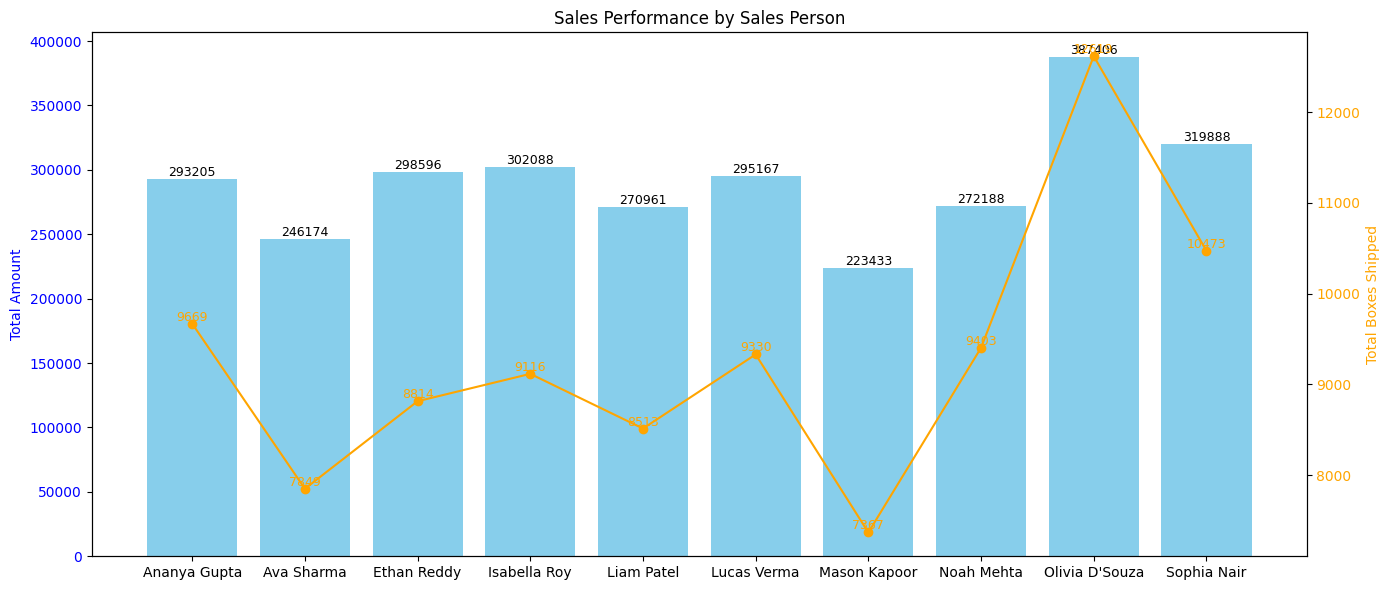

In [13]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar plot for Total Amount
bars = ax1.bar(result['Sales_Person'], result['Total_Amt'], color='skyblue', label='Total Amount')
ax1.set_ylabel('Total Amount', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=9)

# Line plot for Total Boxes Shipped (twin axis)
ax2 = ax1.twinx()
ax2.plot(result['Sales_Person'], result['Total_Box_Shipped'], color='orange', marker='o', label='Total Boxes Shipped')
ax2.set_ylabel('Total Boxes Shipped', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add value labels on line points
for i, val in enumerate(result['Total_Box_Shipped']):
    ax2.text(i, val, f'{val:.0f}', ha='center', va='bottom', fontsize=9, color='orange')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.title('Sales Performance by Sales Person')
plt.tight_layout()
plt.show()



**b) Who are the top 5 salespersons by total revenue and by boxes shipped?**

In [14]:
top_by_rev = result.sort_values(by='Total_Amt', ascending=False).drop(columns=['Total_Box_Shipped'])
print("Top SalesMan by total revenue: \n", top_by_rev.head())

print()

top_by_box = result.sort_values(by='Total_Box_Shipped', ascending=False).drop(columns='Total_Amt')
print("Top Salesman by Total Box Shipped: \n", top_by_box.head())


Top SalesMan by total revenue: 
      Sales_Person  Total_Amt
8  Olivia D'Souza  387405.91
9     Sophia Nair  319887.82
3    Isabella Roy  302087.60
2     Ethan Reddy  298595.61
5     Lucas Verma  295166.91

Top Salesman by Total Box Shipped: 
      Sales_Person  Total_Box_Shipped
8  Olivia D'Souza              12619
9     Sophia Nair              10473
0    Ananya Gupta               9669
7      Noah Mehta               9403
5     Lucas Verma               9330


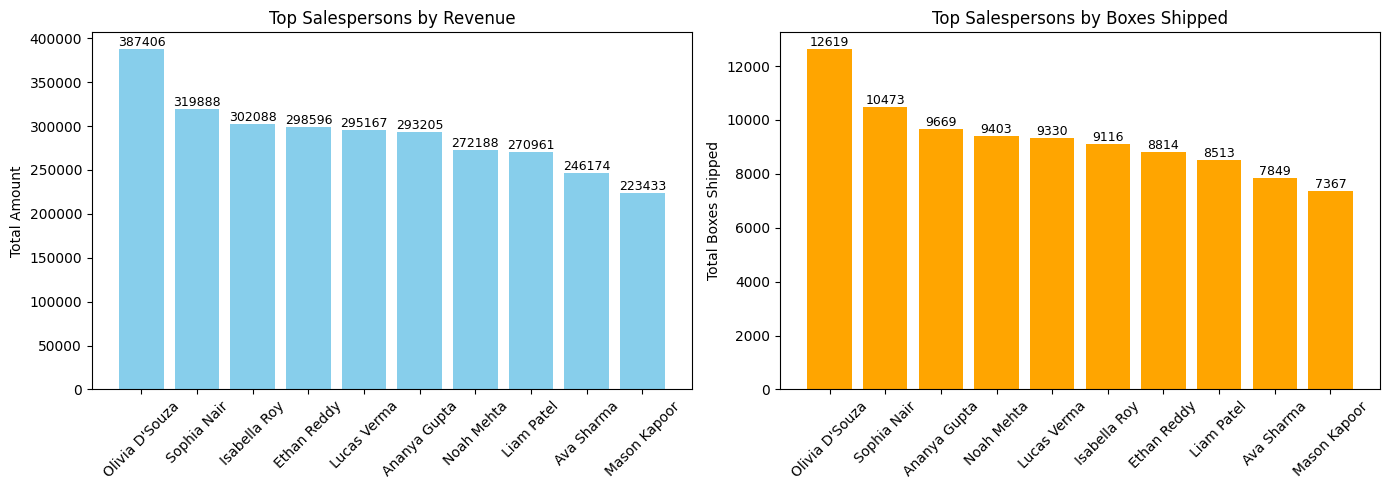

In [15]:
#  subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Top Salespersons by Total Revenue
axes[0].bar(top_by_rev['Sales_Person'], top_by_rev['Total_Amt'], color='skyblue')
axes[0].set_title('Top Salespersons by Revenue')
axes[0].set_ylabel('Total Amount')
axes[0].tick_params(axis='x', rotation=45)

# Add labels on bars
for i, val in enumerate(top_by_rev['Total_Amt']):
    axes[0].text(i, val, f'{val:.0f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Top Salespersons by Boxes Shipped
axes[1].bar(top_by_box['Sales_Person'], top_by_box['Total_Box_Shipped'], color='orange')
axes[1].set_title('Top Salespersons by Boxes Shipped')
axes[1].set_ylabel('Total Boxes Shipped')
axes[1].tick_params(axis='x', rotation=45)

# Add labels on bars
for i, val in enumerate(top_by_box['Total_Box_Shipped']):
    axes[1].text(i, val, f'{val:.0f}', ha='center', va='bottom', fontsize=9)

# Adjust layout
plt.tight_layout()
plt.show()


**c) Which salesperson has the highest revenue per box (efficiency)?**

In [16]:
result['efficiency'] = result['Total_Amt']/result['Total_Box_Shipped']
top_eff = result.sort_values(by='efficiency', ascending=False)
print("Top salesman by efficiency are: \n", top_eff)

Top salesman by efficiency are: 
      Sales_Person  Total_Amt  Total_Box_Shipped  efficiency
2     Ethan Reddy  298595.61               8814   33.877423
3    Isabella Roy  302087.60               9116   33.138175
4      Liam Patel  270960.55               8513   31.829032
5     Lucas Verma  295166.91               9330   31.636325
1      Ava Sharma  246174.28               7849   31.363776
8  Olivia D'Souza  387405.91              12619   30.700207
9     Sophia Nair  319887.82              10473   30.544049
6    Mason Kapoor  223432.69               7367   30.328857
0    Ananya Gupta  293204.67               9669   30.324198
7      Noah Mehta  272188.08               9403   28.946940


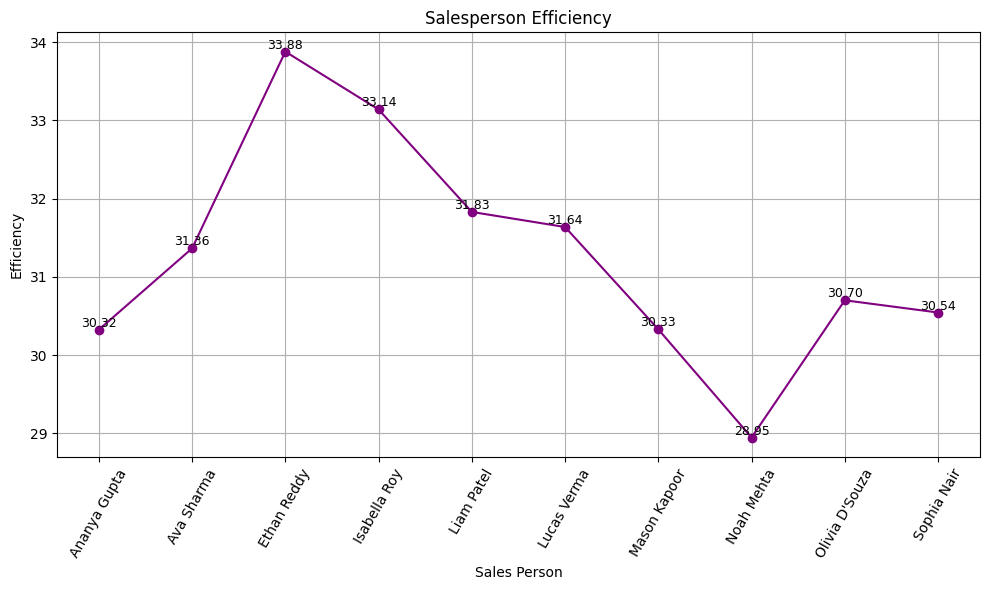

In [17]:
# Line plot 
plt.figure(figsize=(10, 6))
plt.plot(result['Sales_Person'], result['efficiency'], marker='o', linestyle='-', color='purple')
plt.title('Salesperson Efficiency')
plt.xlabel('Sales Person')
plt.ylabel('Efficiency')
plt.xticks(rotation=60)
plt.grid(True)

# Add values above points
for i, val in enumerate(result['efficiency']):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**d) How does performance vary across salespersons over time (monthly/quarterly trend)?**

In [18]:
monthly_df = df.groupby(['Sales_Person', 'Month'])['Amount'].sum().unstack(fill_value=0)

monthly_df['Total_Amount'] = monthly_df.sum(axis=1)

total = round(monthly_df['Total_Amount'].sum(), 2)

monthly_df['rev_%'] = ((monthly_df['Total_Amount'] / total) * 100).round(2).astype(str) + '%'

print("Monthly Performance of Salespersons:\n")
monthly_df


Monthly Performance of Salespersons:



Month,April,August,February,January,July,June,March,May,Total_Amount,rev_%
Sales_Person,,,,,,,,,,
Ananya Gupta,25735.68,40017.11,20199.24,29231.41,67196.91,34000.98,15305.32,61518.02,293204.67,10.08%
Ava Sharma,33518.62,0.00,44196.84,17464.56,17321.36,29697.45,69548.60,34426.85,246174.28,8.46%
Ethan Reddy,65116.04,11884.01,14100.91,32086.13,39076.39,0.00,82387.96,53944.17,298595.61,10.26%
Isabella Roy,68355.53,37060.88,7754.36,23527.31,8386.70,46792.60,96438.83,13771.39,302087.60,10.38%
Liam Patel,76321.31,68703.64,8477.25,15378.80,3432.89,7715.44,36552.39,54378.83,270960.55,9.31%
Lucas Verma,27633.39,10657.82,26097.61,82361.30,46798.86,3214.37,58117.32,40286.24,295166.91,10.15%
Mason Kapoor,42518.41,39506.81,3703.09,15514.28,58175.77,29573.23,32486.46,1954.64,223432.69,7.68%
Noah Mehta,37594.66,23672.11,25398.71,57868.09,49923.51,31937.23,18377.86,27415.91,272188.08,9.36%
Olivia D'Souza,51306.10,23820.74,45009.17,52871.63,33609.16,102843.64,20508.18,57437.29,387405.91,13.32%


In [19]:
quarterly_df = df.groupby(['Sales_Person', 'Quarter'])['Amount'].sum().unstack(fill_value=0)

quarterly_df['Total_Amount'] = quarterly_df.sum(axis=1)

total = round(quarterly_df['Total_Amount'].sum(), 2)
quarterly_df['rev_%'] = ((quarterly_df['Total_Amount'] / total) * 100).round(2).astype(str) + '%'

print("Quarterly Performance of Salespersons:\n")
quarterly_df

Quarterly Performance of Salespersons:



Quarter,Q1,Q2,Q3,Total_Amount,rev_%
Sales_Person,,,,,
Ananya Gupta,64735.97,121254.68,107214.02,293204.67,10.08%
Ava Sharma,131210.00,97642.92,17321.36,246174.28,8.46%
Ethan Reddy,128575.00,119060.21,50960.40,298595.61,10.26%
Isabella Roy,127720.50,128919.52,45447.58,302087.60,10.38%
Liam Patel,60408.44,138415.58,72136.53,270960.55,9.31%
Lucas Verma,166576.23,71134.00,57456.68,295166.91,10.15%
Mason Kapoor,51703.83,74046.28,97682.58,223432.69,7.68%
Noah Mehta,101644.66,96947.80,73595.62,272188.08,9.36%
Olivia D'Souza,118388.98,211587.03,57429.90,387405.91,13.32%


## **2. Country-wise Analysis**

**a) Which countries generate the most and least revenue overall?**

In [20]:
result = df.groupby('Country')['Amount'].sum().reset_index(name='Total_Rev').sort_values(by='Total_Rev', ascending=False)

tops = result.head(3)
bottom = result.tail(3)

print("Top 3 Countries by Revenue:\n", tops)
print("\nBottom 3 Countries by Revenue:\n", bottom)


Top 3 Countries by Revenue:
        Country  Total_Rev
5          USA  628487.86
3  New Zealand  557059.85
0    Australia  505497.64

Bottom 3 Countries by Revenue:
   Country  Total_Rev
4      UK  497061.54
1  Canada  374562.31
2   India  346434.92


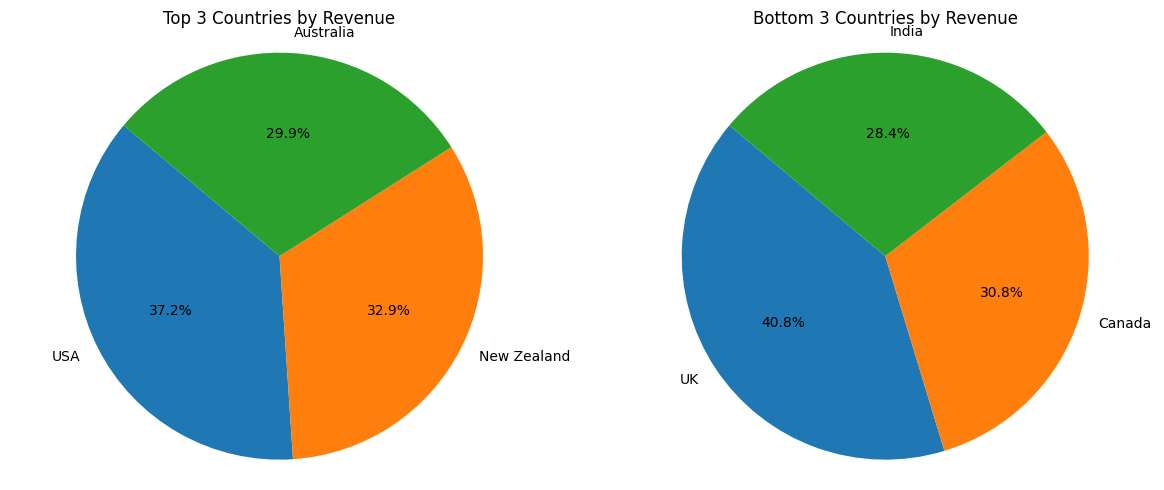

In [21]:
# Pie chart for top 3 countries by revenue
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(tops['Total_Rev'], labels=tops['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Countries by Revenue')
plt.axis('equal')

# Pie chart for bottom 3 countries by revenue
plt.subplot(1, 2, 2)
plt.pie(bottom['Total_Rev'], labels=bottom['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Bottom 3 Countries by Revenue')
plt.axis('equal')

plt.tight_layout()
plt.show()


**b) What is the average revenue per shipment in each country? Just measure the efficiency of every country**

In [22]:
avg_rev_per_shipment = df.groupby('Country').apply(lambda x: x['Amount'].sum() / x['Box_Shipped'].sum()).reset_index(name='Avg_Rev_per_Shipment')
avg_rev_per_shipment

C:\Users\andi\AppData\Local\Temp\ipykernel_7476\2232775094.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_rev_per_shipment = df.groupby('Country').apply(lambda x: x['Amount'].sum() / x['Box_Shipped'].sum()).reset_index(name='Avg_Rev_per_Shipment')


,Country,Avg_Rev_per_Shipment
0,Australia,30.868200
1,Canada,32.670066
2,India,28.891245
3,New Zealand,30.759793
4,UK,31.720583
5,USA,32.162523


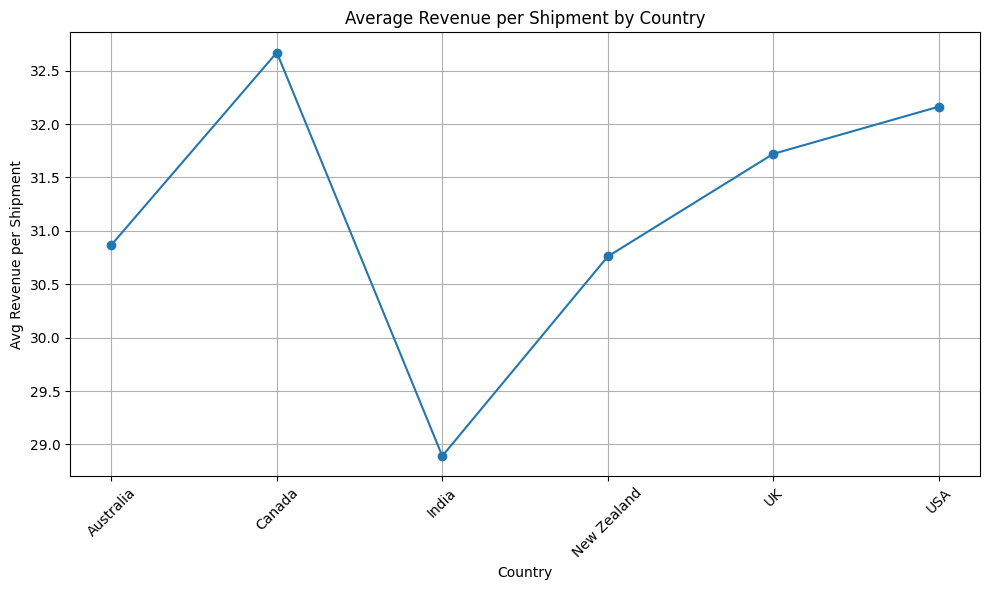

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(avg_rev_per_shipment['Country'], avg_rev_per_shipment['Avg_Rev_per_Shipment'], marker='o', linestyle='-')
plt.title('Average Revenue per Shipment by Country')
plt.xlabel('Country')
plt.ylabel('Avg Revenue per Shipment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**c) Are there countries with high product volumes but low revenue (or vice versa)?**

In [24]:
# group by Country
country_summary = df.groupby('Country')[['Amount', 'Box_Shipped']].sum().reset_index()

# Calculate revenue per box
country_summary['Rev_per_Box'] = (country_summary['Amount'] / country_summary['Box_Shipped']).round(2)

# Sort to spot high volume but low revenue 
country_summary = country_summary.sort_values(by='Rev_per_Box')

country_summary


,Country,Amount,Box_Shipped,Rev_per_Box
2,India,346434.92,11991,28.89
3,New Zealand,557059.85,18110,30.76
0,Australia,505497.64,16376,30.87
4,UK,497061.54,15670,31.72
5,USA,628487.86,19541,32.16
1,Canada,374562.31,11465,32.67


C:\Users\andi\AppData\Local\Temp\ipykernel_7476\3721332787.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(country_summary['Country'], rotation=45)


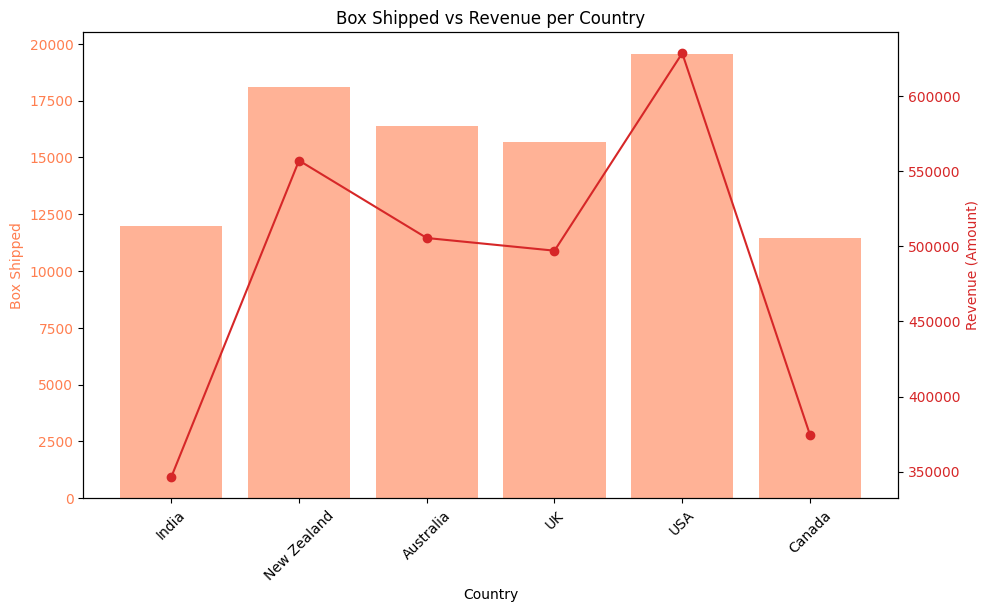

In [25]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis: Box Shipped
color='coral'
ax1.set_xlabel('Country')
ax1.set_ylabel('Box Shipped', color=color)
ax1.bar(country_summary['Country'], country_summary['Box_Shipped'], color=color, alpha=0.6, label='Box Shipped')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(country_summary['Country'], rotation=45)

# Second y-axis: Revenue
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Revenue (Amount)', color=color)
ax2.plot(country_summary['Country'], country_summary['Amount'], color=color, marker='o', label='Revenue')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Box Shipped vs Revenue per Country')
plt.show()

**d) How do country-wise sales fluctuate monthly/seasonally?**

In [26]:
monthly_sales = df.groupby(['Country', 'Month'])['Amount'].sum().unstack(fill_value=0)
monthly_sales

Month,April,August,February,January,July,June,March,May
Country,,,,,,,,
Australia,82176.20,25935.09,11344.93,46857.08,60271.80,112325.20,100841.71,65745.63
Canada,104682.31,60730.82,19492.31,66725.67,50699.06,11181.76,21289.60,39760.78
India,29999.18,42080.05,8239.99,11516.58,56942.28,28912.98,118137.54,50606.32
New Zealand,48421.56,57564.37,77587.28,55960.75,61464.54,69570.43,76856.49,109634.43
UK,60261.56,73841.28,56369.27,55980.14,68373.56,59737.29,50278.65,72219.79
USA,127109.23,15147.34,40990.78,122722.29,61904.49,85273.99,116697.60,58642.14


In [27]:
quarterly_sales = df.groupby(['Country', 'Quarter'])['Amount'].sum().unstack(fill_value=0)
quarterly_sales


Quarter,Q1,Q2,Q3
Country,,,
Australia,159043.72,260247.03,86206.89
Canada,107507.58,155624.85,111429.88
India,137894.11,109518.48,99022.33
New Zealand,210404.52,227626.42,119028.91
UK,162628.06,192218.64,142214.84
USA,280410.67,271025.36,77051.83


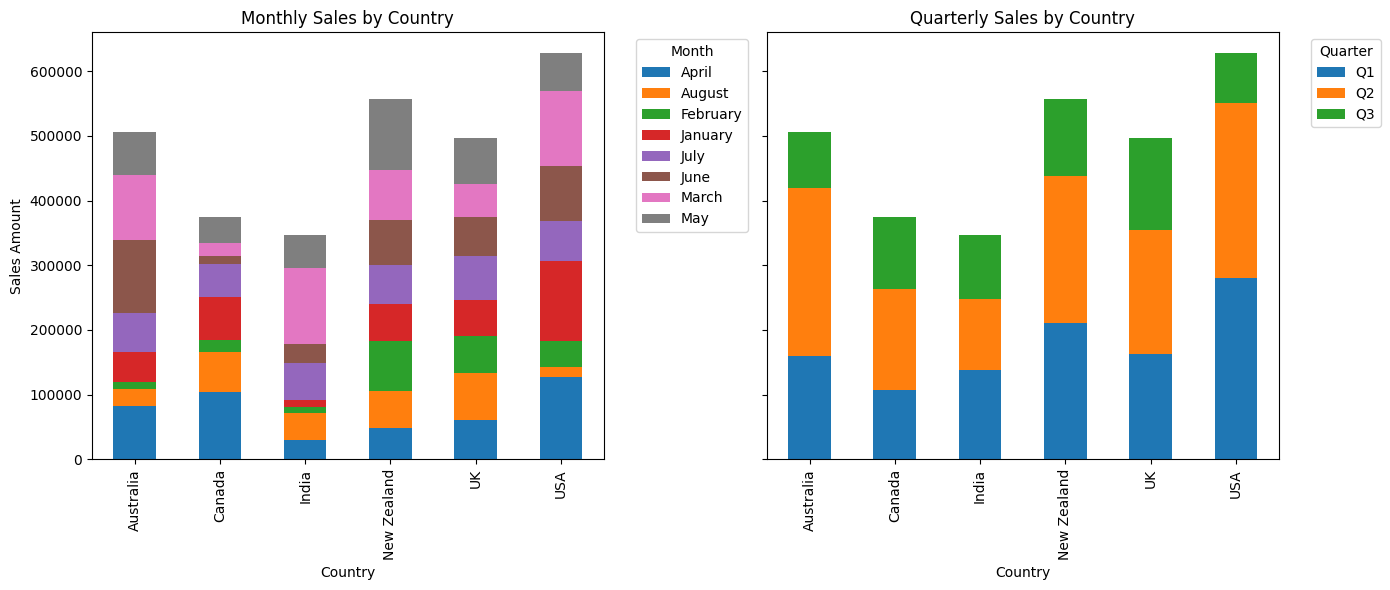

In [28]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Monthly bar chart
monthly_sales.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Monthly Sales by Country')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Sales Amount')
axes[0].legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

# Quarterly bar chart
quarterly_sales.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Quarterly Sales by Country')
axes[1].set_xlabel('Country')
axes[1].legend(title='Quarter', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


**e) Which countries have strong or weak product-market fit for premium products?**

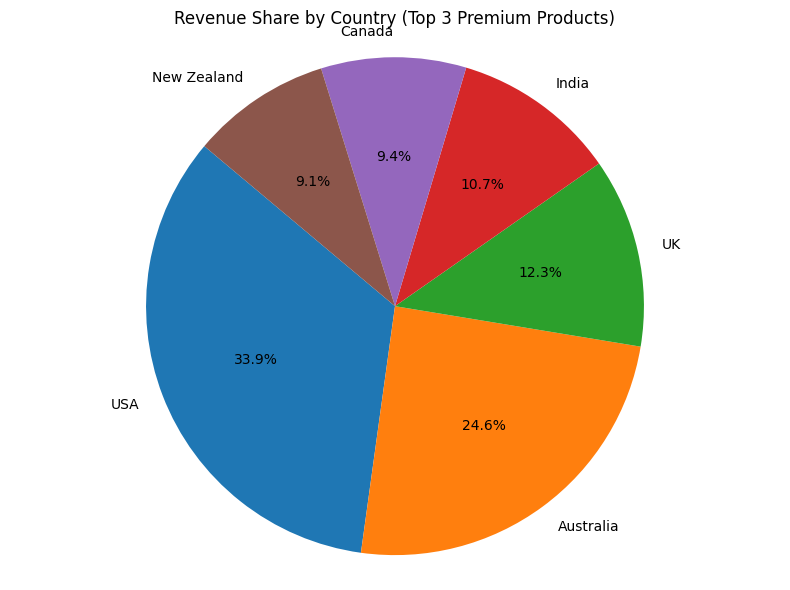

In [29]:
df['Price_per_Box'] = df['Amount'] / df['Box_Shipped']
top_premium = df.groupby('Product')['Price_per_Box'].mean().nlargest(3).index
country_revenue = df[df['Product'].isin(top_premium)].groupby('Country')['Amount'].sum().reset_index(name='total').sort_values(by='total', ascending=False)

# plot
plt.figure(figsize=(8, 6))
plt.pie(country_revenue['total'], labels=country_revenue['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue Share by Country (Top 3 Premium Products)')
plt.axis('equal')
plt.tight_layout()
plt.show()


## **3. Sales Efficiency & KPIs**

**a) What is the average revenue per box overall, per product, and per country?**

In [30]:
total_rev = df['Amount'].sum()
total_box = df['Box_Shipped'].sum()

overall_per_box = total_rev / total_box
print("Overall Avg Revenue per Box:", round(overall_per_box, 2))

per_product = df.groupby('Product').apply(lambda x: x['Amount'].sum() / x['Box_Shipped'].sum()).reset_index(name='avg_rev_per_product')
print("\nAvg Revenue per Box (Per Product):\n", per_product.round(2))

per_country = df.groupby('Country').apply(lambda x: x['Amount'].sum() / x['Box_Shipped'].sum()).reset_index(name='avg_rev_per_country')
print("\nAvg Revenue per Box (Per Country):\n", per_country.round(2))


Overall Avg Revenue per Box: 31.23

Avg Revenue per Box (Per Product):
                     Product  avg_rev_per_product
0             Aloe Vera Gel                29.23
1          Anti-Aging Serum                31.29
2         Body Butter Cream                31.55
3        Charcoal Face Wash                28.84
4          Face Sheet Masks                33.58
5           Hair Repair Oil                33.35
6      Hydrating Face Serum                31.38
7             Lip Balm Pack                27.08
8         Niacinamide Toner                33.32
9          Rose Water Toner                33.97
10         SPF 50 Sunscreen                31.15
11  Salicylic Acid Cleanser                30.54
12     Tea Tree Moisturizer                31.36
13          Under Eye Cream                31.68
14          Vitamin C Cream                30.38

Avg Revenue per Box (Per Country):
        Country  avg_rev_per_country
0    Australia                30.87
1       Canada                32.67

C:\Users\andi\AppData\Local\Temp\ipykernel_7476\3571406706.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  per_product = df.groupby('Product').apply(lambda x: x['Amount'].sum() / x['Box_Shipped'].sum()).reset_index(name='avg_rev_per_product')
C:\Users\andi\AppData\Local\Temp\ipykernel_7476\3571406706.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  per_country = df.groupby('Country').apply(lambda x:

C:\Users\andi\AppData\Local\Temp\ipykernel_7476\3615779945.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(per_product['Product'], rotation=45, ha='right')
C:\Users\andi\AppData\Local\Temp\ipykernel_7476\3615779945.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(per_country['Country'], rotation=45, ha='right')


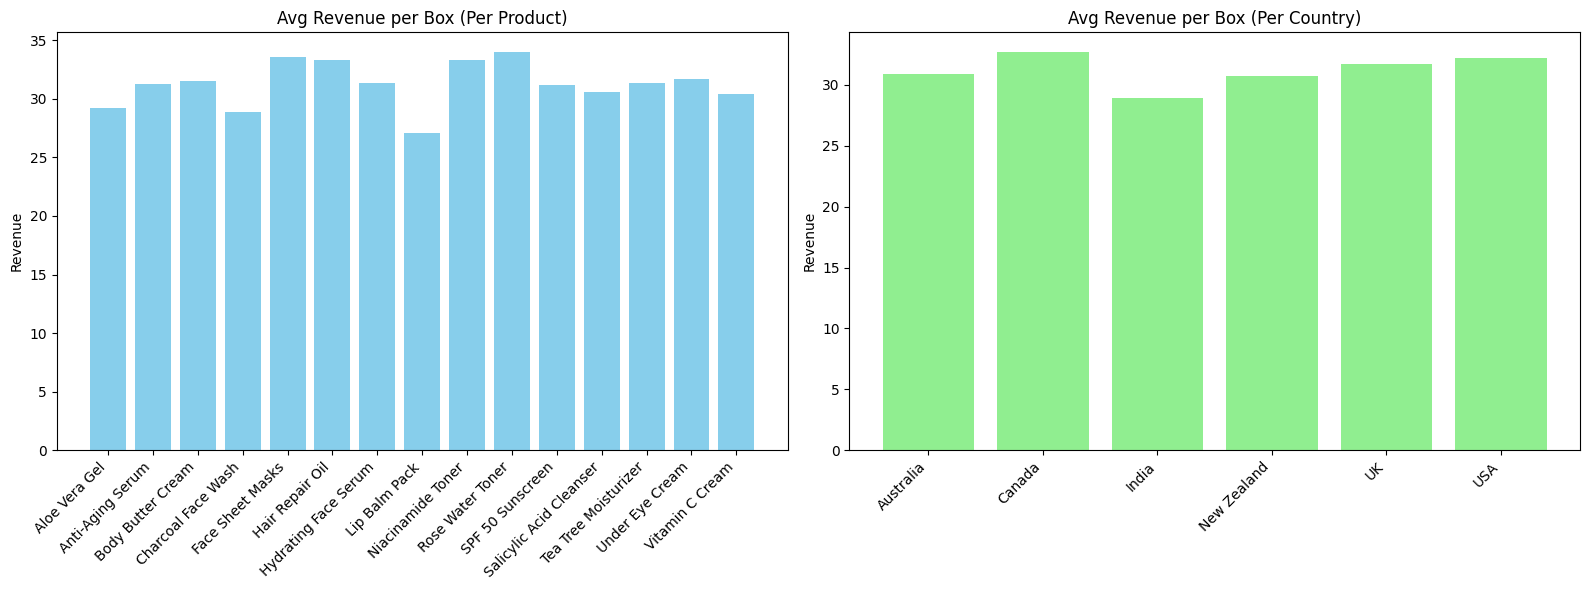

In [31]:
# Data (assuming per_product and per_country are already created as per your code)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# plot 1 - Per Product
axes[0].bar(per_product['Product'], per_product['avg_rev_per_product'], color='skyblue')
axes[0].set_title('Avg Revenue per Box (Per Product)')
axes[0].set_ylabel('Revenue')
axes[0].set_xticklabels(per_product['Product'], rotation=45, ha='right')

# plot 2 - Per Country
axes[1].bar(per_country['Country'], per_country['avg_rev_per_country'], color='lightgreen')
axes[1].set_title('Avg Revenue per Box (Per Country)')
axes[1].set_ylabel('Revenue')
axes[1].set_xticklabels(per_country['Country'], rotation=45, ha='right')

plt.tight_layout()
plt.show()


**b) Is there a strong correlation between boxes shipped and revenue?**

In [32]:
ans = df.corr(numeric_only=True)
ans

,Amount,Box_Shipped,Price_per_Box
Amount,1.000000,0.818700,0.559064
Box_Shipped,0.818700,1.000000,0.081013
Price_per_Box,0.559064,0.081013,1.000000


***A correlation of 0.82 between Box_Shipped and Amount indicates a strong positive correlation.***

**c) Is there a strong correlation between boxes shipped and revenue?**

In [33]:
df['Price_per_Box'] = df['Amount'] / df['Box_Shipped']
ans = df.sort_values(by='Price_per_Box', ascending=False)
ans

,Sales_Person,Country,Product,Date,Amount,Box_Shipped,Month,Quarter,Price_per_Box
154,Ananya Gupta,Australia,Tea Tree Moisturizer,2022-05-09,8326.18,167,May,Q2,49.857365
241,Ethan Reddy,Australia,Hair Repair Oil,2022-04-15,23977.48,481,April,Q2,49.849231
283,Ethan Reddy,New Zealand,Anti-Aging Serum,2022-03-24,21726.67,436,March,Q1,49.831812
333,Sophia Nair,UK,SPF 50 Sunscreen,2022-06-02,7060.26,142,June,Q2,49.720141
193,Mason Kapoor,Australia,Charcoal Face Wash,2022-03-24,3977.20,80,March,Q1,49.715000
...,...,...,...,...,...,...,...,...,...
62,Ava Sharma,New Zealand,Tea Tree Moisturizer,2022-07-25,5132.41,454,July,Q3,11.304868
89,Noah Mehta,USA,Face Sheet Masks,2022-03-08,146.70,13,March,Q1,11.284615
21,Noah Mehta,Canada,Hydrating Face Serum,2022-07-17,2369.18,211,July,Q3,11.228341
57,Noah Mehta,New Zealand,Rose Water Toner,2022-03-23,1745.79,156,March,Q1,11.190962


**d) Which combinations of product + country + salesperson yield the best efficiency?**

In [34]:
# Calculate efficiency per combination
combo_eff = df.groupby(['Product', 'Country', 'Sales_Person']).apply(
    lambda x: x['Amount'].sum() / x['Box_Shipped'].sum()
).reset_index(name='Efficiency')

# Sort by efficiency (highest first)
combo_eff = combo_eff.sort_values(by='Efficiency', ascending=False)

combo_eff.head()


C:\Users\andi\AppData\Local\Temp\ipykernel_7476\3031849231.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combo_eff = df.groupby(['Product', 'Country', 'Sales_Person']).apply(


,Product,Country,Sales_Person,Efficiency
241,Tea Tree Moisturizer,Australia,Ananya Gupta,49.857365
101,Hair Repair Oil,Australia,Ethan Reddy,49.849231
33,Anti-Aging Serum,New Zealand,Ethan Reddy,49.831812
70,Charcoal Face Wash,Australia,Mason Kapoor,49.715000
79,Charcoal Face Wash,USA,Ava Sharma,49.371324


## **4. Product Analysis**

**a) Which products contribute the most to overall revenue?**

In [35]:
top_products = df.groupby('Product')['Amount'].sum().reset_index(name='Total_Revenue')
top_products = top_products.sort_values(by='Total_Revenue', ascending=False)
top_products

,Product,Total_Revenue
12,Tea Tree Moisturizer,260905.44
6,Hydrating Face Serum,250323.33
5,Hair Repair Oil,232864.77
1,Anti-Aging Serum,232248.00
2,Body Butter Cream,222923.58
10,SPF 50 Sunscreen,218576.97
14,Vitamin C Cream,218210.84
0,Aloe Vera Gel,202901.75
4,Face Sheet Masks,197882.89
13,Under Eye Cream,195936.57


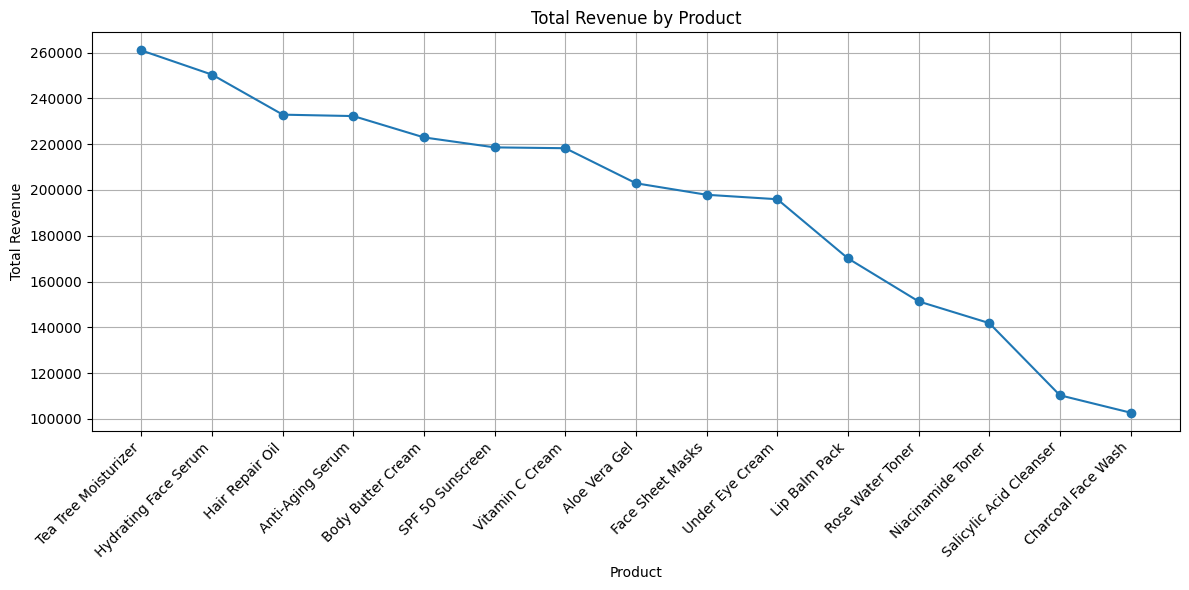

In [36]:
# Sort the data by Total Revenue (already sorted in your code)
plt.figure(figsize=(12, 6))
plt.plot(top_products['Product'], top_products['Total_Revenue'], marker='o', linestyle='-')

# Formatting
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product')
plt.grid(True)
plt.tight_layout()

plt.show()

**b) What is the average revenue per box for each product?**

In [37]:
avg_rev_per_box = df.groupby('Product').apply(lambda x: x['Amount'].sum() / x['Box_Shipped'].sum()).reset_index(name='Avg_Rev_per_Box')
avg_rev_per_box

C:\Users\andi\AppData\Local\Temp\ipykernel_7476\1440876319.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_rev_per_box = df.groupby('Product').apply(lambda x: x['Amount'].sum() / x['Box_Shipped'].sum()).reset_index(name='Avg_Rev_per_Box')


,Product,Avg_Rev_per_Box
0,Aloe Vera Gel,29.232351
1,Anti-Aging Serum,31.287620
2,Body Butter Cream,31.553231
3,Charcoal Face Wash,28.841499
4,Face Sheet Masks,33.579313
5,Hair Repair Oil,33.347382
6,Hydrating Face Serum,31.380636
7,Lip Balm Pack,27.081785
8,Niacinamide Toner,33.319584
9,Rose Water Toner,33.967380


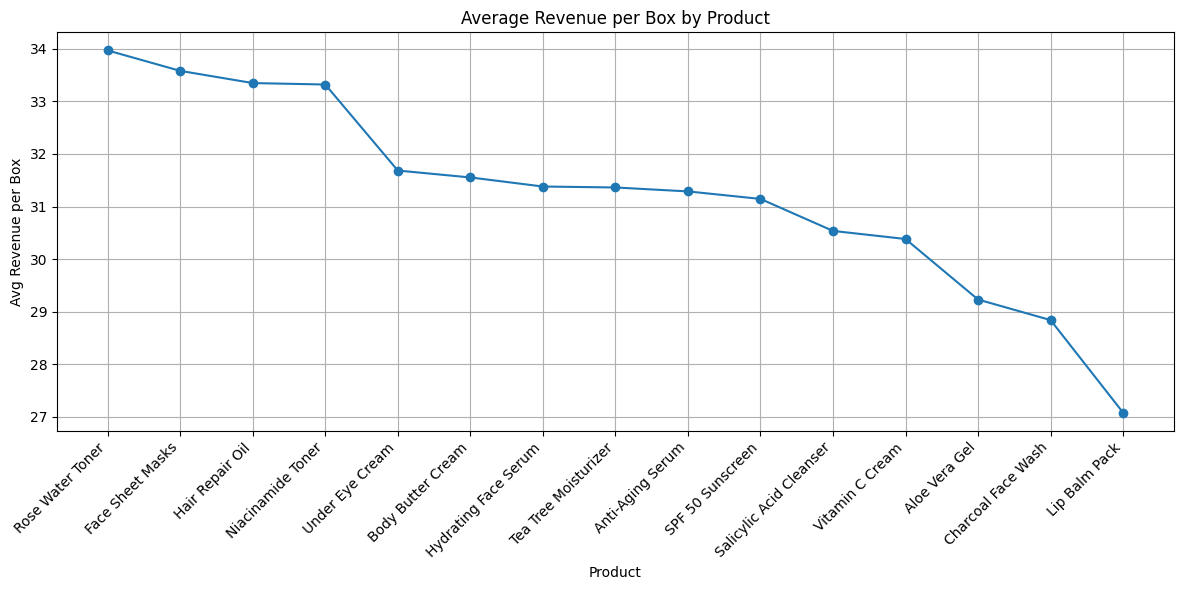

In [38]:
# Sort the dataframe for better visualization
avg_rev_per_box_sorted = avg_rev_per_box.sort_values(by='Avg_Rev_per_Box', ascending=False)

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(avg_rev_per_box_sorted['Product'], avg_rev_per_box_sorted['Avg_Rev_per_Box'], marker='o', linestyle='-')

# Improve readability
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product')
plt.ylabel('Avg Revenue per Box')
plt.title('Average Revenue per Box by Product')
plt.grid(True)
plt.tight_layout()

plt.show()


**c) Which products are most/least popular in each country?**

In [39]:
# Group and sum
popularity = df.groupby(['Country', 'Product'])['Box_Shipped'].sum().reset_index()

# Top 2 most popular products per country
most_popular = popularity.sort_values(['Country', 'Box_Shipped'], ascending=[True, False]) \
                         .groupby('Country').head(2)

# Bottom 2 least popular products per country
least_popular = popularity.sort_values(['Country', 'Box_Shipped'], ascending=[True, True]) \
                          .groupby('Country').head(2)

print("Most Popular Products:\n", most_popular.to_string())
print("\nLeast Popular Products:\n", least_popular.to_string())


Most Popular Products:
         Country               Product  Box_Shipped
5     Australia       Hair Repair Oil         2429
14    Australia       Vitamin C Cream         1795
28       Canada       Under Eye Cream         1572
27       Canada  Tea Tree Moisturizer         1559
31        India      Anti-Aging Serum         1795
35        India       Hair Repair Oil         1476
47  New Zealand     Body Butter Cream         2780
55  New Zealand      SPF 50 Sunscreen         2621
66           UK  Hydrating Face Serum         2746
60           UK         Aloe Vera Gel         1763
76          USA      Anti-Aging Serum         3283
84          USA      Rose Water Toner         1876

Least Popular Products:
         Country                  Product  Box_Shipped
9     Australia         Rose Water Toner          343
11    Australia  Salicylic Acid Cleanser          439
24       Canada         Rose Water Toner          175
17       Canada        Body Butter Cream          234
43        India  

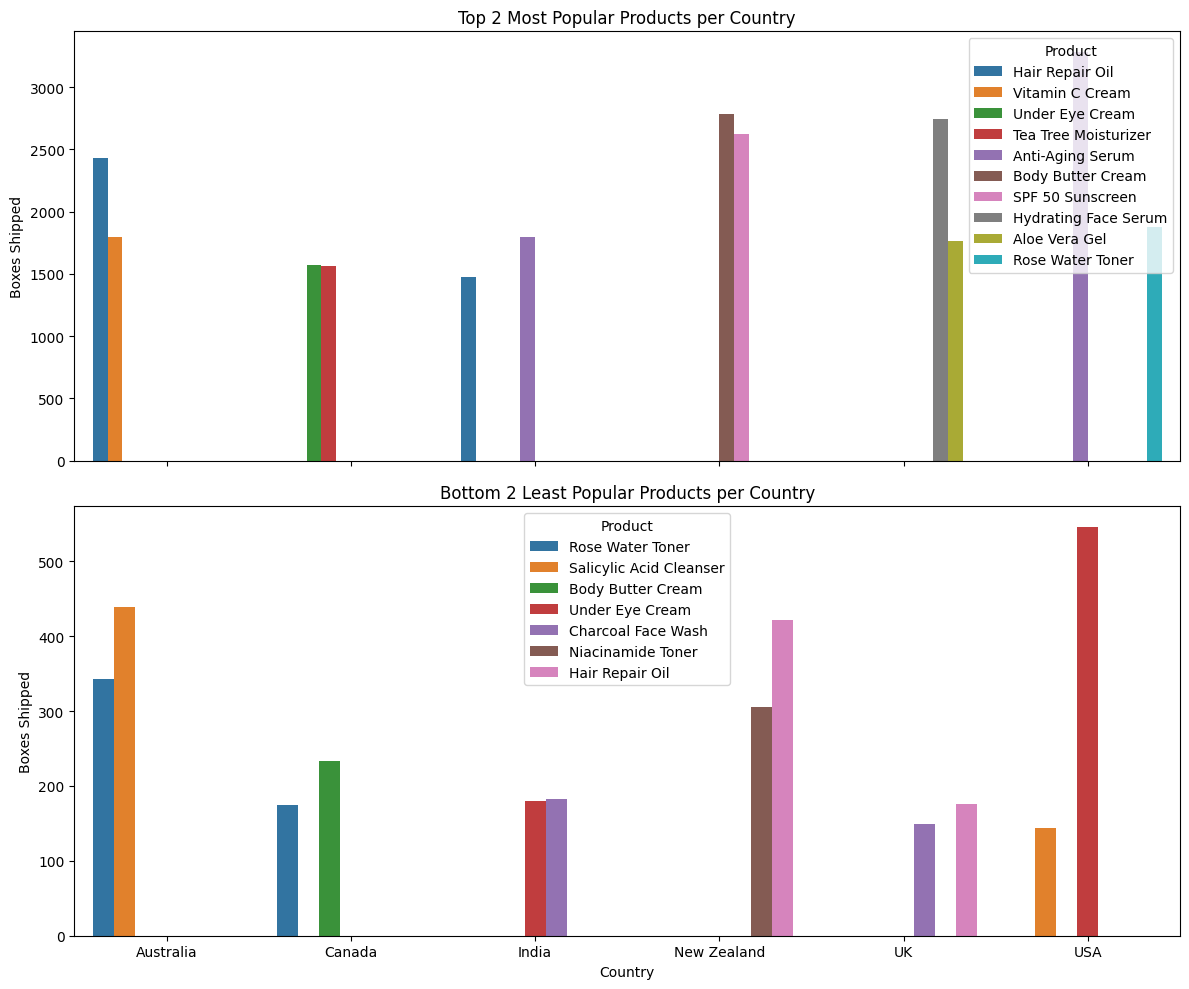

In [40]:
# Set up the figure
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top 2 Products
sns.barplot(data=most_popular, x='Country', y='Box_Shipped', hue='Product', ax=axes[0])
axes[0].set_title('Top 2 Most Popular Products per Country')
axes[0].set_ylabel('Boxes Shipped')
axes[0].set_xlabel('')
axes[0].legend(title='Product')

# Bottom 2 Products
sns.barplot(data=least_popular, x='Country', y='Box_Shipped', hue='Product', ax=axes[1])
axes[1].set_title('Bottom 2 Least Popular Products per Country')
axes[1].set_ylabel('Boxes Shipped')
axes[1].set_xlabel('Country')
axes[1].legend(title='Product')

plt.tight_layout()
plt.show()


**d) Are there products that are consistently sold with high revenue but low volume?**

In [41]:
df['Month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')
# measuring rev of every product on every month basis of all years, to find consistency
consistency = df.groupby(['Product', 'Month_year'])['Amount'].sum().reset_index()

# to aggregate the results of consistency: grouped the Products, on Amount apply mean, std dev, and count (month counts)
consistency_stats = consistency.groupby('Product')['Amount'].agg(['mean', 'std', 'count']).reset_index()
consistency_stats

# to get the exact products which performend very well! wehave to get the constant values from business side to filter the results

,Product,mean,std,count
0,Aloe Vera Gel,33816.958333,17820.661582,6
1,Anti-Aging Serum,29031.000000,22761.276170,8
2,Body Butter Cream,27865.447500,16563.077816,8
3,Charcoal Face Wash,14676.202857,17131.386327,7
4,Face Sheet Masks,24735.361250,12780.551234,8
5,Hair Repair Oil,29108.096250,20987.907901,8
6,Hydrating Face Serum,31290.416250,19192.952721,8
7,Lip Balm Pack,21262.586250,17983.629470,8
8,Niacinamide Toner,23640.245000,18103.523343,6
9,Rose Water Toner,18915.585000,13113.011965,8


**e) How do product sales vary over time — are there seasonal bestsellers?**

In [42]:
# a better way to assign quarters
# df['Quarter'] = df['Date'].dt.quarter.apply(lambda x: f'Q{x}')

total_per_product = df.groupby('Product')['Amount'].sum().reset_index(name='Total_Product_Amount')

quarter_rev = df.groupby(['Product', 'Quarter'])['Amount'].sum().reset_index(name='Quarter_Amount')

merged = pd.merge(quarter_rev, total_per_product, on='Product')
merged['Quarter_Percentage'] = (merged['Quarter_Amount'] / merged['Total_Product_Amount']) * 100

result = merged.sort_values(by=['Product', 'Quarter'])

result


,Product,Quarter,Quarter_Amount,Total_Product_Amount,Quarter_Percentage
0,Aloe Vera Gel,Q1,107555.74,202901.75,53.008779
1,Aloe Vera Gel,Q2,65443.56,202901.75,32.253817
2,Aloe Vera Gel,Q3,29902.45,202901.75,14.737404
3,Anti-Aging Serum,Q1,119811.45,232248.00,51.587721
4,Anti-Aging Serum,Q2,84508.84,232248.00,36.387327
5,Anti-Aging Serum,Q3,27927.71,232248.00,12.024952
6,Body Butter Cream,Q1,72021.96,222923.58,32.307915
7,Body Butter Cream,Q2,110161.23,222923.58,49.416589
8,Body Butter Cream,Q3,40740.39,222923.58,18.275496
9,Charcoal Face Wash,Q1,61540.94,102733.42,59.903525


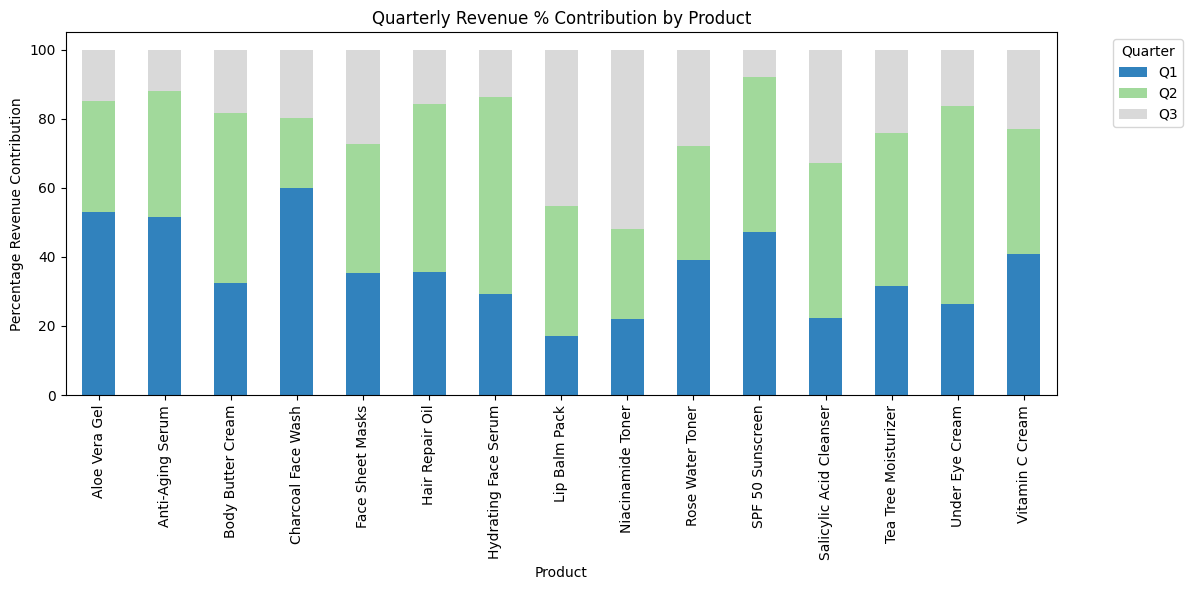

In [43]:
# pivot the data for plotting
pivot_df = result.pivot(index='Product', columns='Quarter', values='Quarter_Percentage').fillna(0)

# plot
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')

plt.title('Quarterly Revenue % Contribution by Product')
plt.ylabel('Percentage Revenue Contribution')
plt.xlabel('Product')
plt.legend(title='Quarter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## **5. Statistically Valuable Insights**

**a) Is average revenue per transaction significantly different between UK and India?**

In [44]:
from scipy.stats import ttest_ind

uk_sales = df[df['Country'] == 'UK']['Amount']
india_sales = df[df['Country'] == 'India']['Amount']

t_stat, p_value = ttest_ind(uk_sales, india_sales, equal_var=False)  # Welch’s t-test

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Statistically significant difference in average revenue per transaction between UK and India.")
else:
    print("❌ No statistically significant difference in average revenue per transaction between UK and India.")


T-statistic: 0.87
P-value: 0.3875
❌ No statistically significant difference in average revenue per transaction between UK and India.


**Insights**:

Means, we can spend equally on marketing. Both Countries shows the almost same results

**b) Does revenue per box for “Aloe Vera Gel” vary significantly across countries?**

In [45]:
from scipy.stats import f_oneway

gel_data = df[df['Product'] == 'Aloe Vera Gel'].copy()

gel_data['Revenue_per_Box'] = gel_data['Amount'] / gel_data['Box_Shipped']

#  Group revenue per box by country
groups = [group['Revenue_per_Box'].values for name, group in gel_data.groupby('Country')]

# Step 4: Perform ANOVA
f_stat, p_value = f_oneway(*groups)

# Step 5: Print result
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Revenue per box for Aloe Vera Gel differs significantly across countries.")
else:
    print("❌ No significant difference in revenue per box across countries.")


F-statistic: 0.99
P-value: 0.4508
❌ No significant difference in revenue per box across countries.


**c) Is the difference in average revenue per order across top 3 salespeople statistically significant?**

In [46]:
from scipy.stats import f_oneway

top_salespeople = df['Sales_Person'].value_counts().head(3).index.tolist()

top_df = df[df['Sales_Person'].isin(top_salespeople)]

groups = [group['Amount'].values for name, group in top_df.groupby('Sales_Person')]

f_stat, p_value = f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("✅ Significant difference in average revenue per order among top salespeople.")
else:
    print("❌ No significant difference found — differences may be due to chance.")


F-statistic: 0.9131219163451098
P-value: 0.4039081505571479
❌ No significant difference found — differences may be due to chance.


# **Conclusion:** 

From above analysis, I have deeply analysed every segment of data, and for business teams, I have figured out the graphs and tables as a business insights which can help them to take major decision regarding the products marketing, processing, shipping, manufacturing, and so on. 

For more improving this, we people can create a detailed interactive presentation or business deck out of it. And that is what actually happens in big tech and consulting firms. 

After all, the stakeholders, or business leaders wants to catch the detailed insights, instead of this technical notebook. This is best for internal working only, as it can be very tough for non-tech business heads to interpret with them.